###DemLin03:
#Sparse linear equations

In [1]:
import numpy as np
from numpy.linalg import norm, cond, solve
from scipy.sparse.linalg import spsolve
import time
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
%matplotlib notebook

C:\Program Files\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Define some timing functions

In [2]:
tic = lambda: time.time()
toc = lambda t: time.time() - t

Compute the time to solve a system of equations, for full and sparce matrices

In [3]:
AA = np.random.rand(1000, 1000)
bb = np.random.rand(1000, 1)
for i in range(1000):
    for j in range(1000):
        if abs(i - j) > 1:
            AA[i,j] = 0

n = np.hstack((np.arange(50, 250, 50), np.arange(300, 1100, 100)))
ratio = np.empty(n.size)
for k in range(n.size):
    A = AA[:n[k], :n[k]]
    b = bb[:n[k]]
    tt = tic()
    for i in range(100):
        x = solve(A, b)

    toc1 = toc(tt)

    S = csc_matrix(A)
    tt = tic()
    for i in range(100):
        x = spsolve(S, b)

    toc2 = toc(tt)
    ratio[k] = toc2 / toc1

Plot effort ratio

<IPython.core.display.Javascript object>


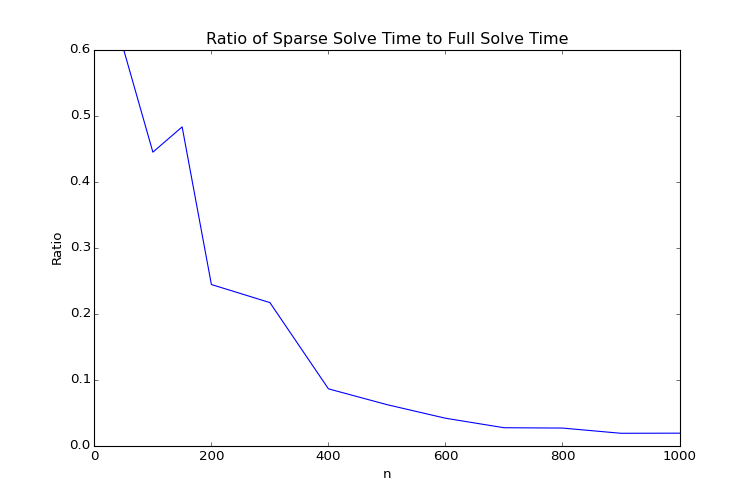

In [4]:
plt.figure(figsize=[6, 6])
plt.plot(n, ratio)
plt.xlabel('n')
plt.ylabel('Ratio')
plt.title('Ratio of Sparse Solve Time to Full Solve Time')